__Import Packages__

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing,impute

plt.style.use('ggplot')
random_state=42
rng = np.random.default_rng(random_state)

C:\Users\Siddhesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r"C:\Siddhesh Data\Study\My Interest\Kaggle\Visualization Data\weatherHistory.csv")
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],errors='coerce',utc=True)
df.drop("Loud Cover",inplace=True,axis=1)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
dtypes: datetime64[n

__Check null values__

In [4]:
cat_col = ["Summary","Precip Type","Daily Summary"]
num_col =["Temperature (C)","Apparent Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
%timeit df.isnull().any().any()
%timeit df.isnull().values.any()
%timeit df.isna().values.any()

12.1 ms ± 712 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12 ms ± 699 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.4 ms ± 711 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


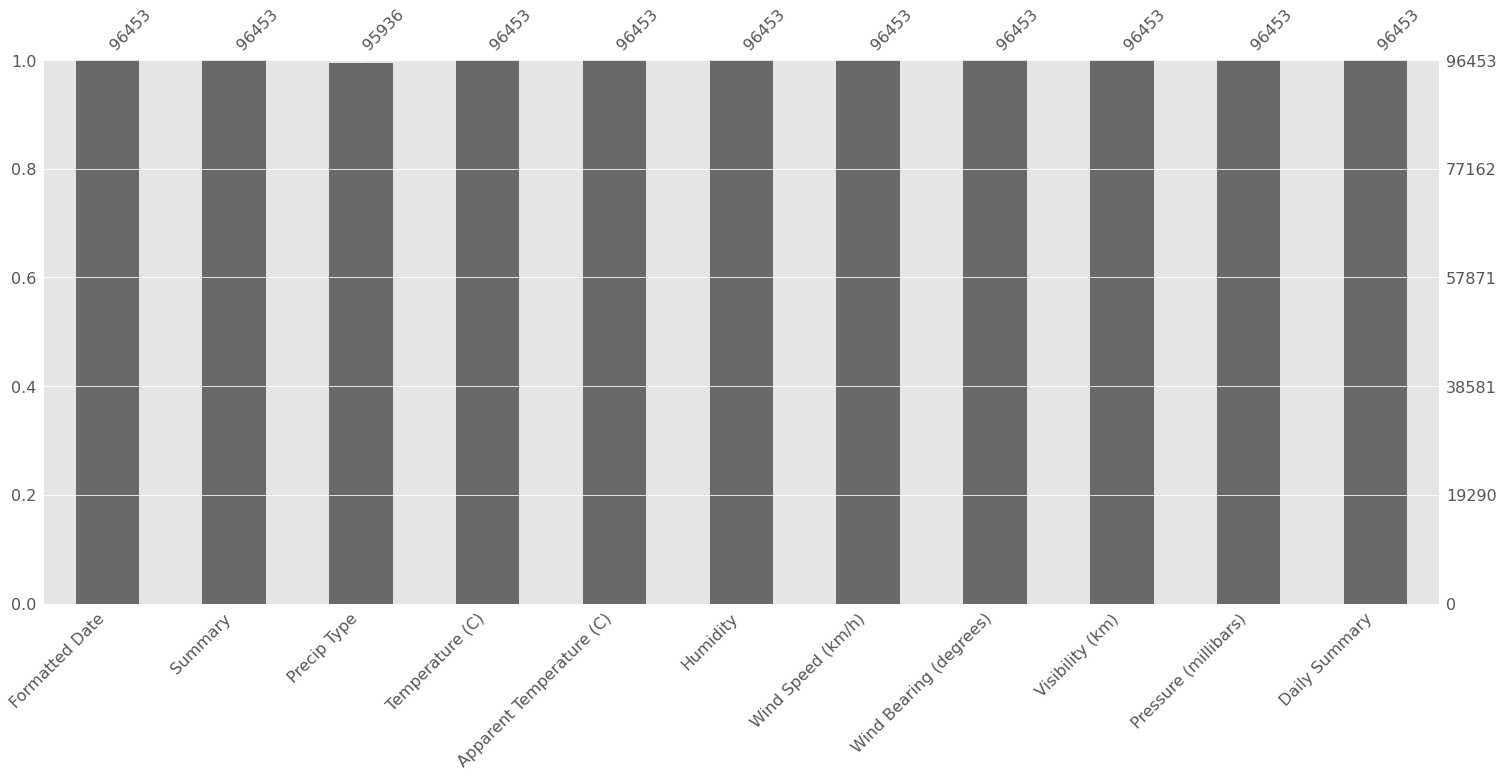

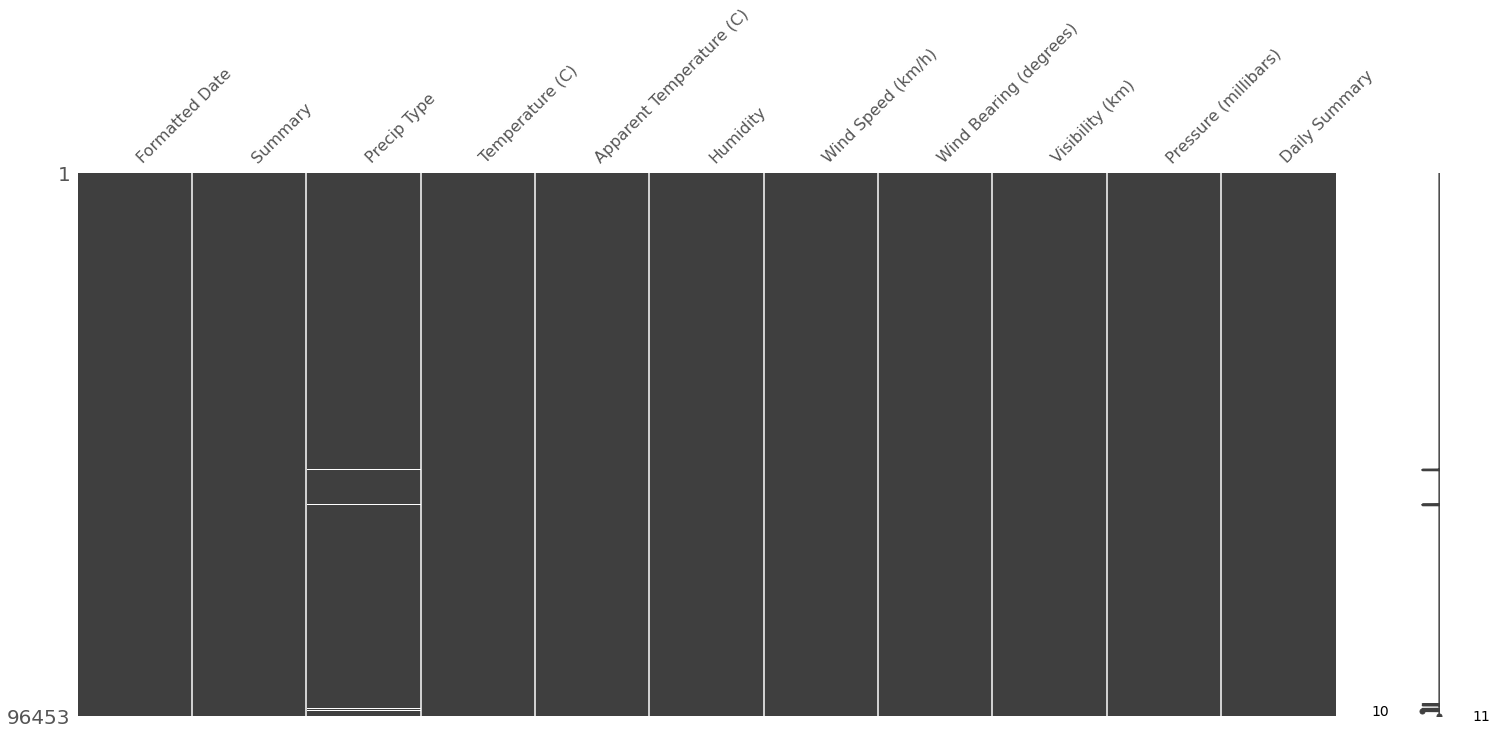

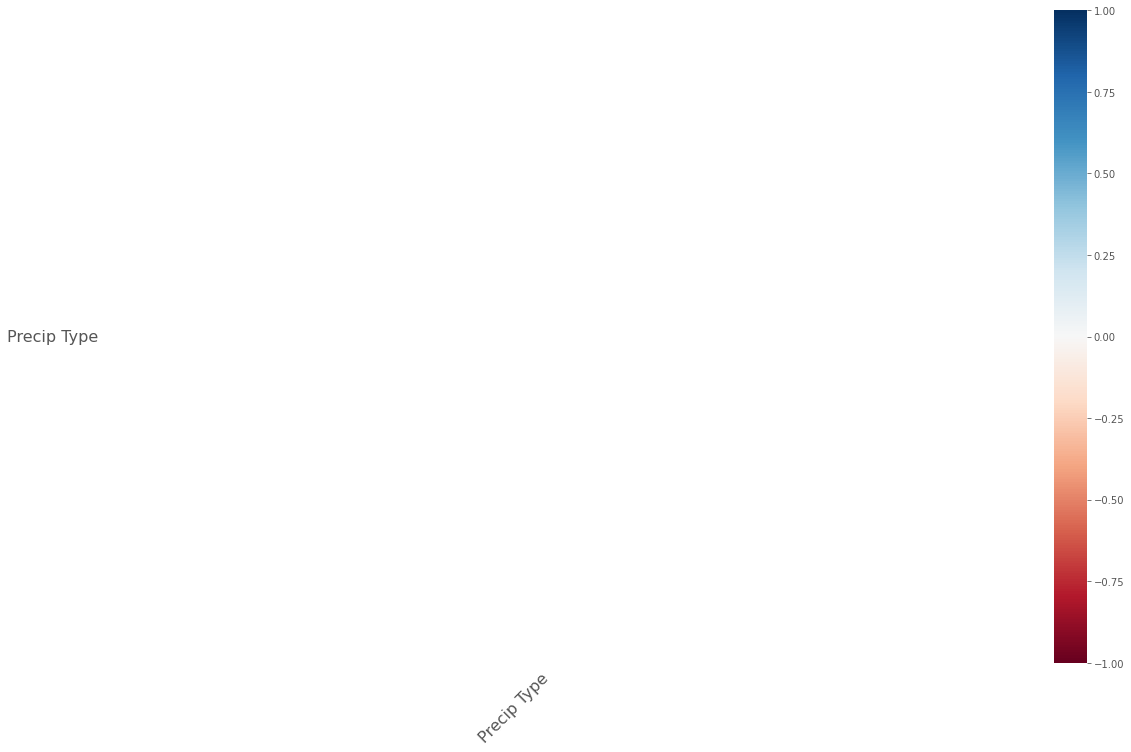

In [6]:
#Visualizing missing number
import missingno as msno
msno.bar(df)
msno.matrix(df)
msno.heatmap(df)
plt.show()

__Heatmap__

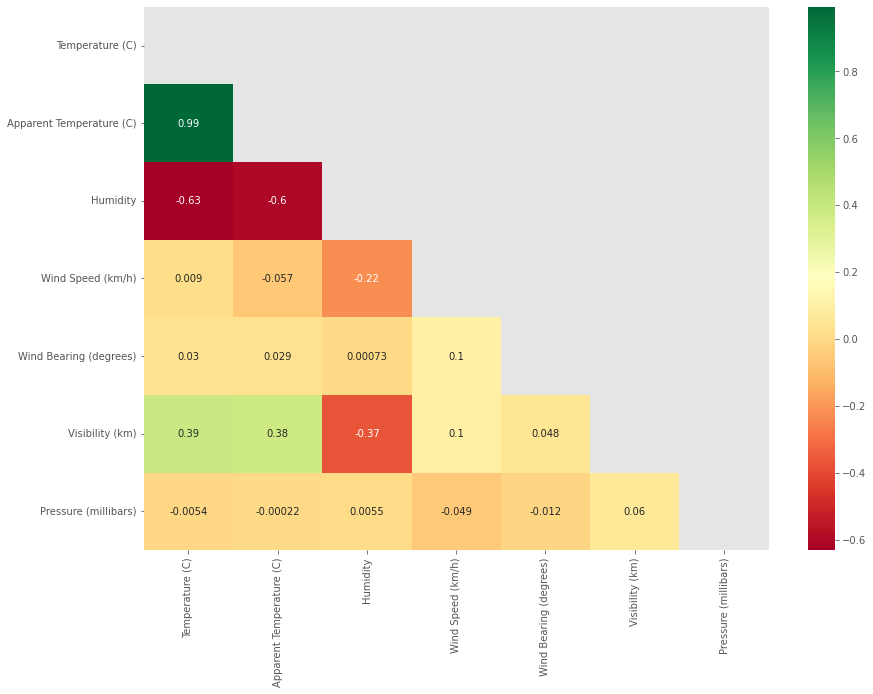

In [7]:
plt.figure(figsize=(14,10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap='RdYlGn',mask=mask,annot=True) #mask if '1' no data will be shown in that cell.
plt.show()

In [8]:
print(df.apply(lambda x:x.nunique()))
df.describe().T.style.background_gradient(vmin=-1,vmax=1,cmap=sns.color_palette("vlag",as_cmap=True))

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.000000,11.932678,9.551546,-21.822222,4.688889,12.000000,18.838889,39.905556
Apparent Temperature (C),96453.000000,10.855029,10.696847,-27.716667,2.311111,12.000000,18.838889,39.344444
Humidity,96453.000000,0.734899,0.195473,0.000000,0.600000,0.780000,0.890000,1.000000
Wind Speed (km/h),96453.000000,10.810640,6.913571,0.000000,5.828200,9.965900,14.135800,63.852600
Wind Bearing (degrees),96453.000000,187.509232,107.383428,0.000000,116.000000,180.000000,290.000000,359.000000
Visibility (km),96453.000000,10.347325,4.192123,0.000000,8.339800,10.046400,14.812000,16.100000
Pressure (millibars),96453.000000,1003.235956,116.969906,0.000000,1011.900000,1016.450000,1021.090000,1046.380000


__Bar Chart with annotation__

In [37]:
def annotate_plot(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 8),
                       textcoords='offset points')

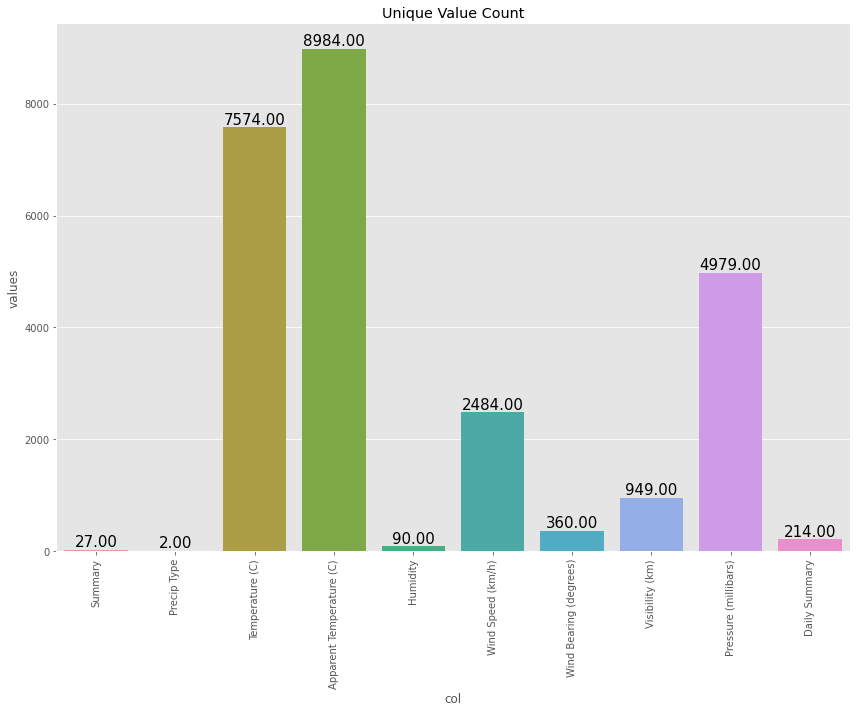

In [38]:
plt.figure(figsize=(12,10))
unique_df = pd.DataFrame(df.apply(lambda x: x.nunique()))
unique_df.drop("Formatted Date",inplace =True)
unique_df = unique_df.reset_index()
unique_df.columns = ["col","values"]
g = sns.barplot(x="col",data = unique_df, y= "values")
annotate_plot(g)
plt.xticks(rotation=90)
plt.title("Unique Value Count")
plt.tight_layout()
plt.show()

__Line Plot__

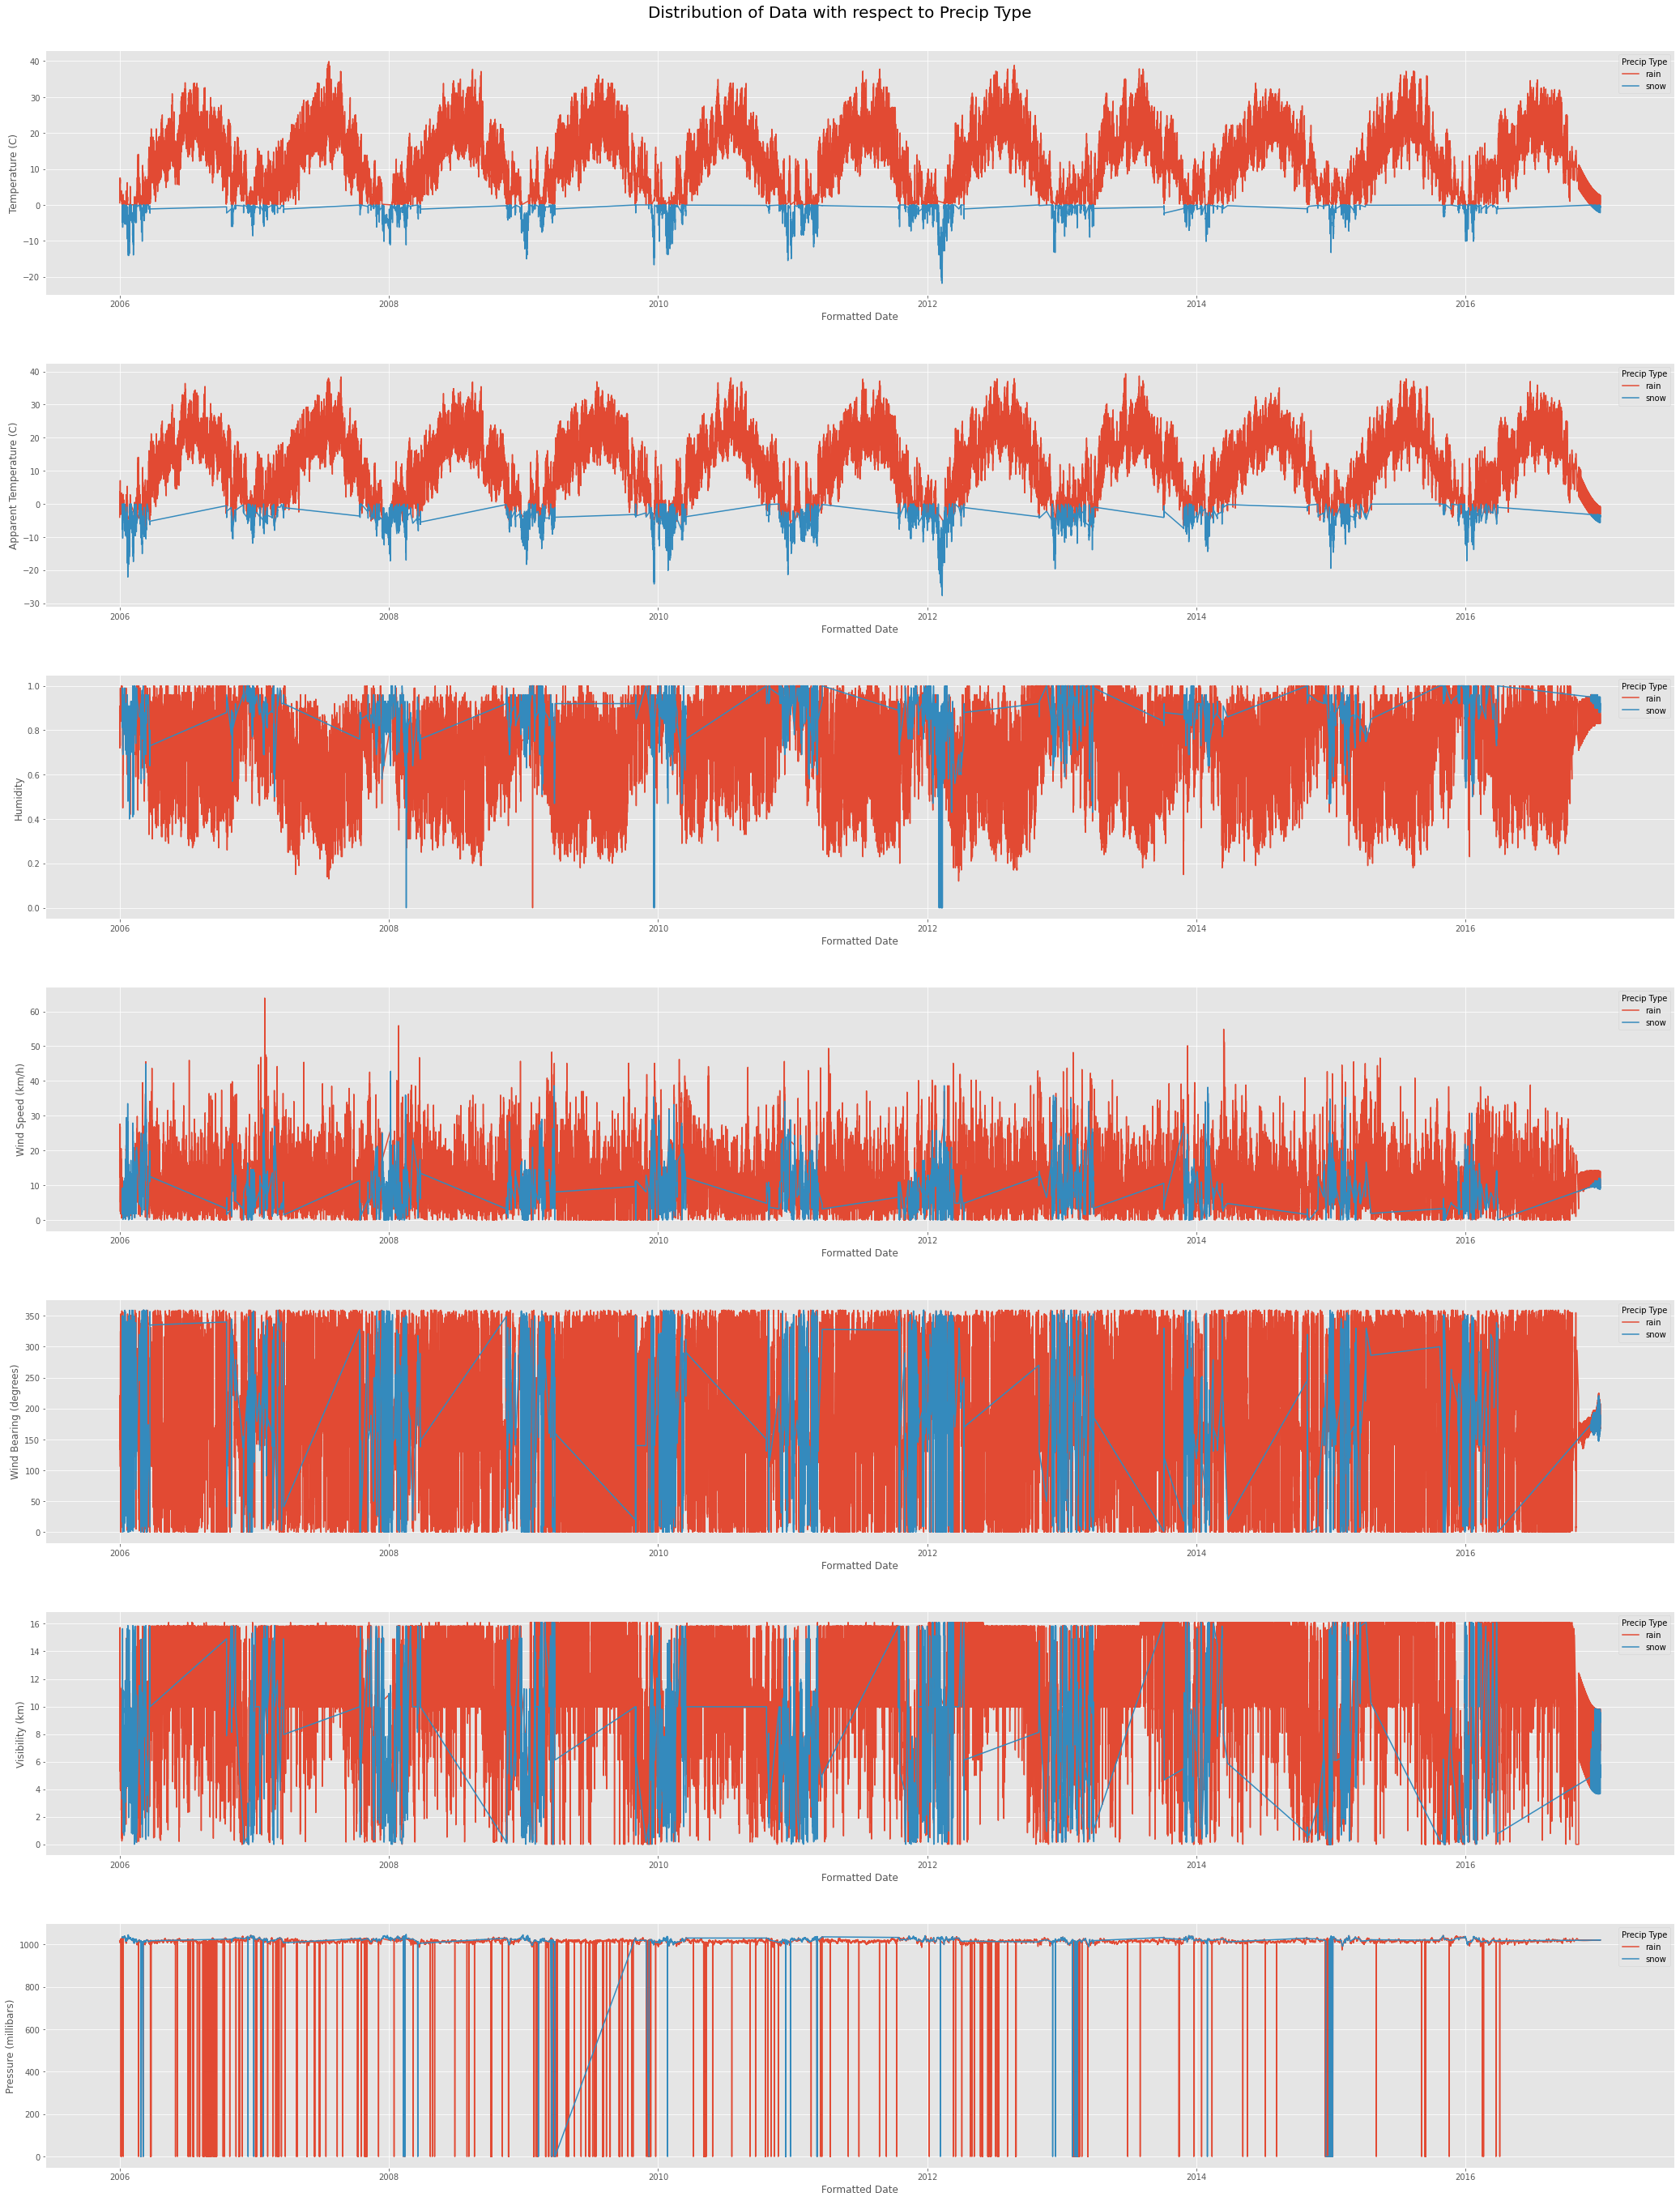

In [62]:
plt.figure(figsize=(30,len(df.columns)*4))
for i,col in enumerate(num_col,1):
    ax = plt.subplot(8,1,i)
    sns.lineplot(data=df, x='Formatted Date',y=col,hue=cat_col[1])
    
plt.suptitle(f"Distribution of Data with respect to {cat_col[1]}",fontsize=20)
plt.tight_layout(pad=5)
plt.show()

In [ ]:
df_date = df.set_index("Formatted Date")

__We can quantify the strength and type of relationship between observations and their lags.__

__In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).__

__A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.__

__Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.__

__This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.__

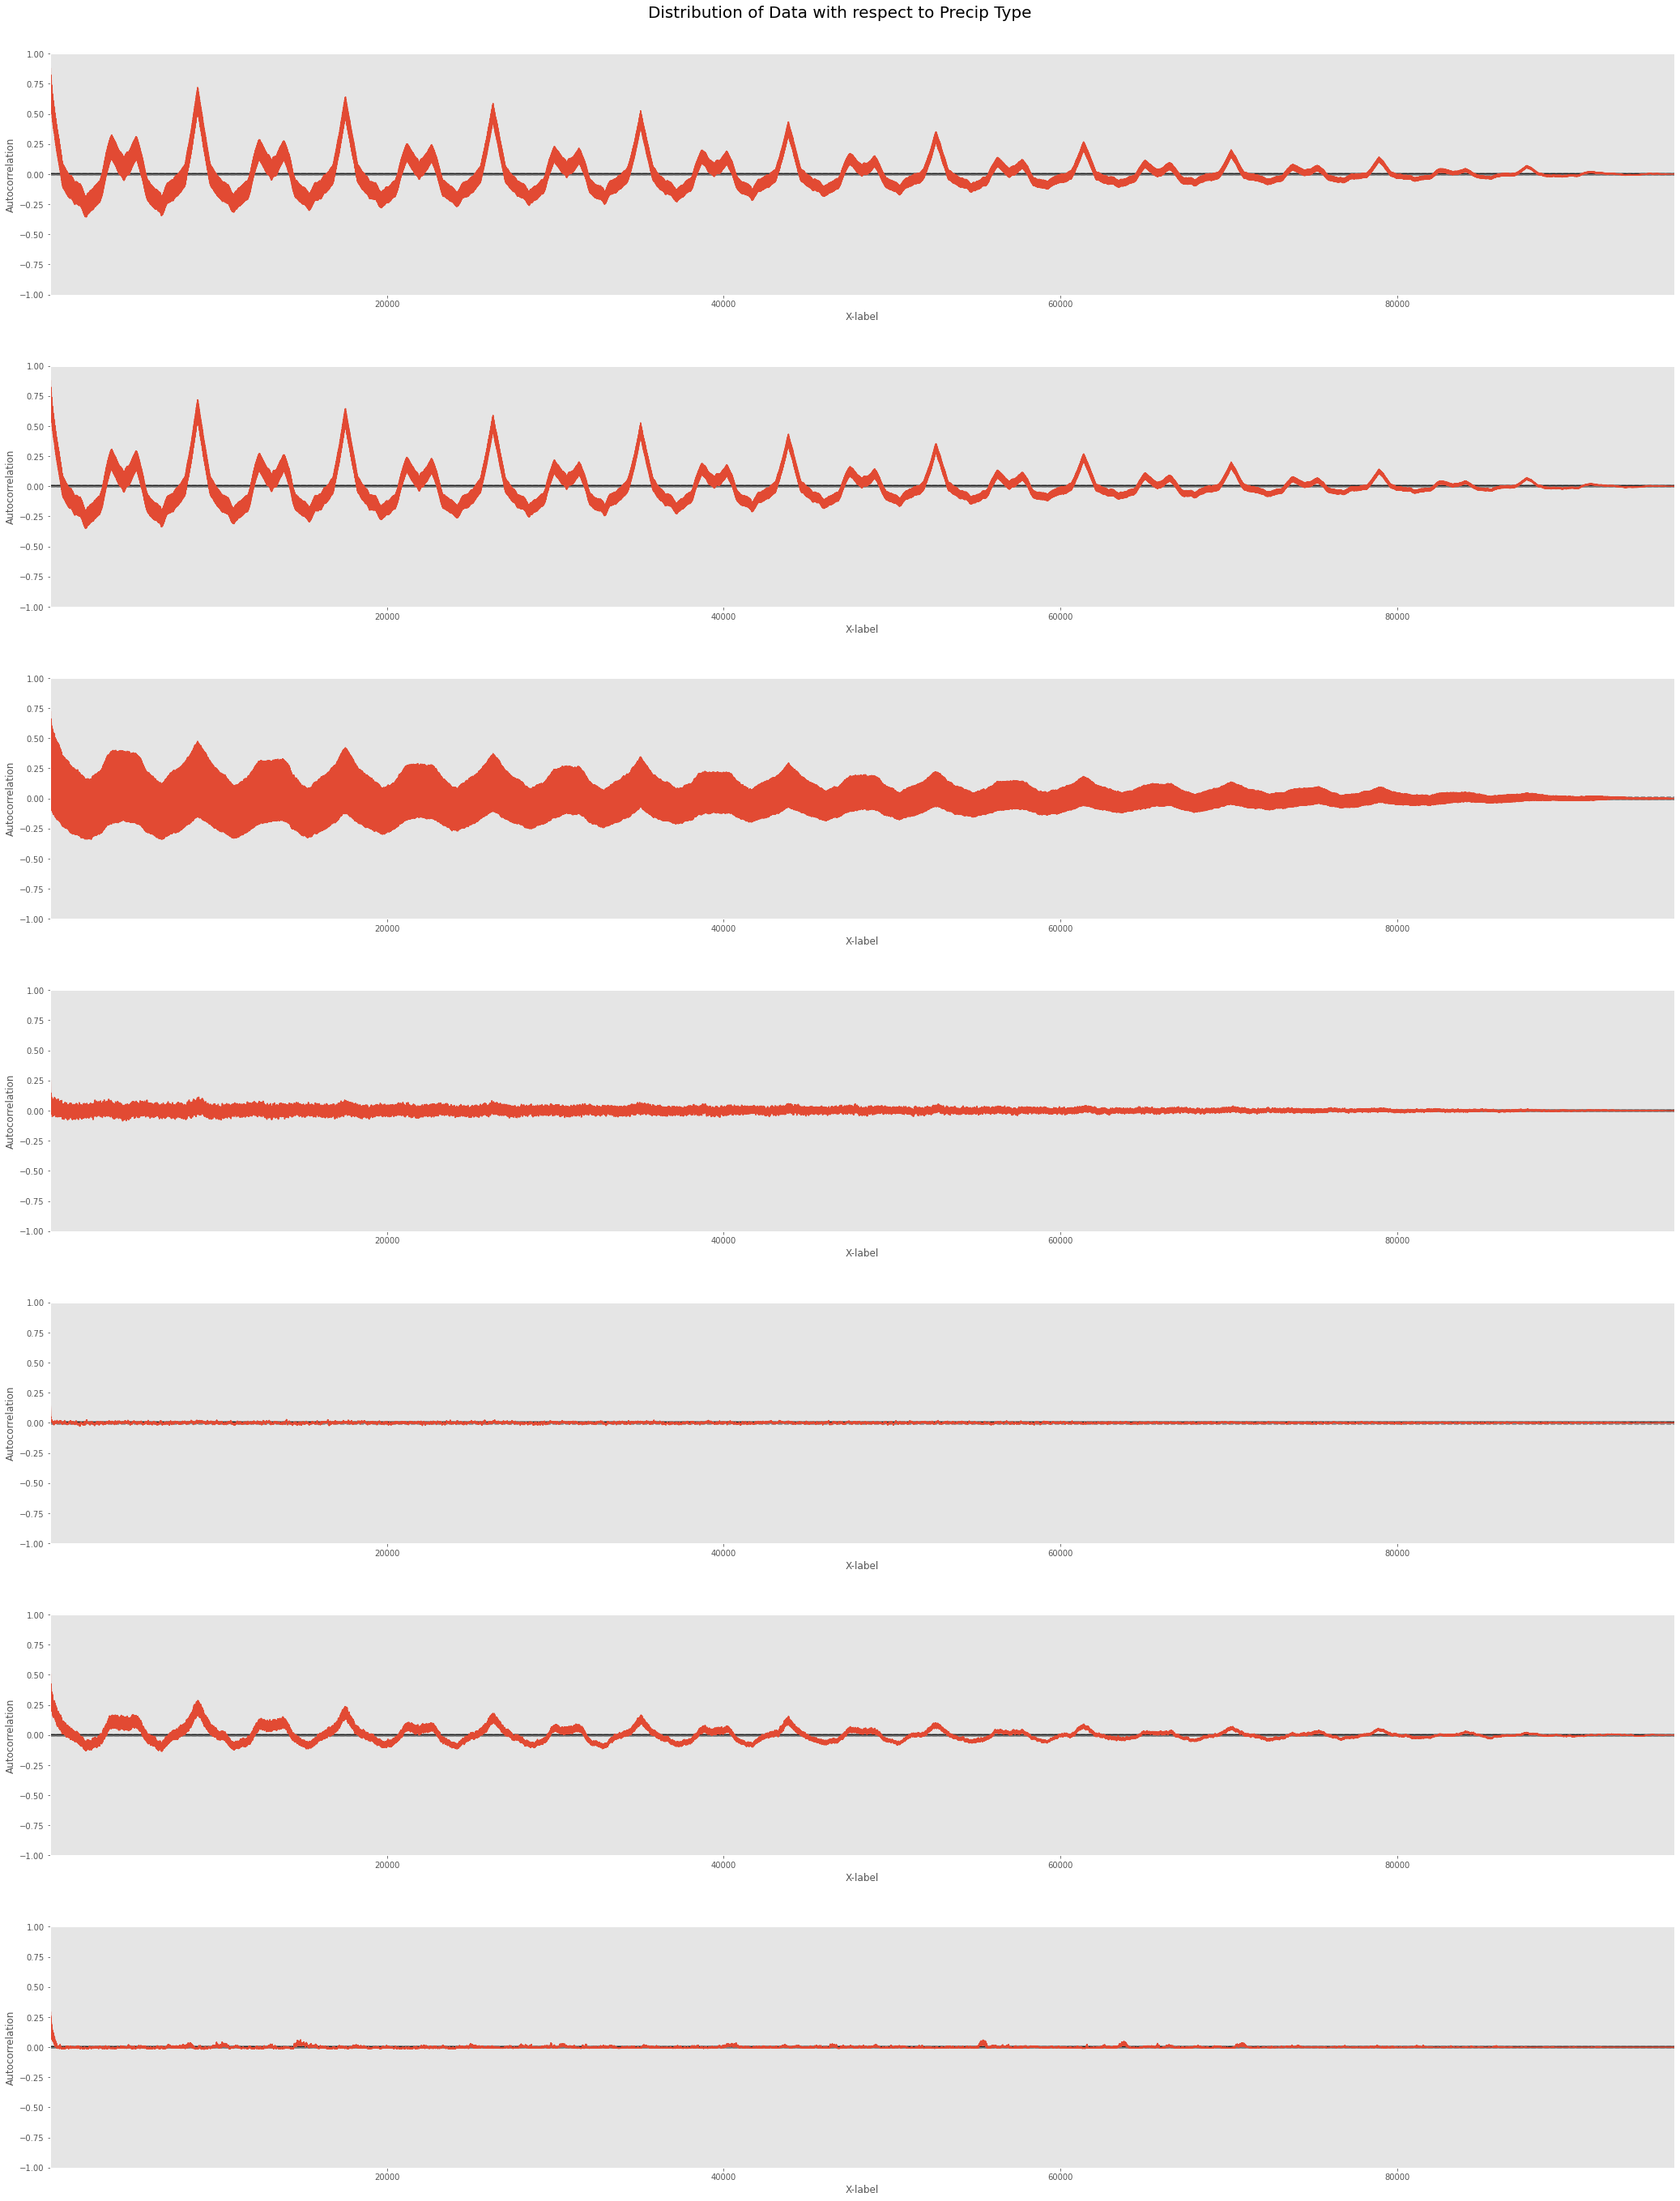

In [70]:
plt.figure(figsize=(30,len(df.columns)*4))
for i,col in enumerate(num_col,1):
    ax = plt.subplot(8,1,i)
    pd.plotting.autocorrelation_plot(df[col])
    plt.xlabel("X-label")
    
plt.suptitle(f"Distribution of Data with respect to {cat_col[1]}",fontsize=20)
plt.tight_layout(pad=5)
plt.show()

__We are not going to take a deep dive in statistics here, So In Statistics, QQ(Quantile Quantile) Plot plays a very vital role to graphically analyse and compare two probability distributions by plotting there quantiles agains each other. If the two distributions which we have compaired are exactly equal then the points on the QQ plot will form a perfect straight line y=x.__

__It is very important for us to know weather our data is normal or not so as to apply various statistical measures on the data and interpret it in much more human understandable visualization and there Q-Q Plot comes into the picture.The most fundamental question answered by QQ-q plot out data normally ditributed__